목표가 설정
아래 공식을 사용하여 목표가(Target)를 계산합니다.
목표가 = 당일 시가 + (전일 변동폭 * K)
변동폭 = 전일 고가 - 전일 저가

In [112]:
from pykrx import stock
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [113]:
kodexInverseX2 = stock.get_market_ohlcv_by_date("20000101", "20250101", "252670")
kodex150X2 = stock.get_market_ohlcv_by_date("20000101", "20250101", "233740")
kodex150X2


,시가,고가,저가,종가,거래량,등락률
날짜,,,,,,
2015-12-17,10240,10405,9970,10330,946156,NaN
2015-12-18,10230,10710,10165,10710,1841150,3.678606
2015-12-21,10695,10825,10670,10720,1274858,0.093371
2015-12-22,10740,10750,10450,10495,1374974,-2.098881
2015-12-23,10535,10635,10415,10425,2532341,-0.666984
...,...,...,...,...,...,...
2024-12-20,6600,6675,6285,6345,38264071,-4.586466
2024-12-23,6500,6690,6360,6535,35383038,2.994484
2024-12-24,6610,6665,6510,6610,27817021,1.147666


In [114]:
# kodexInverseX2

In [115]:
# 변동폭 만들기

kodex150X2['변동폭'] = kodex150X2['고가'] - kodex150X2['저가']
kodexInverseX2['변동폭'] = kodexInverseX2['고가'] - kodexInverseX2['저가']
# kodex150X2.columns

In [116]:
# 전일 변동폭 만들기

kodex150X2['전일 변동폭'] = kodex150X2['변동폭'].shift(periods=1)
kodexInverseX2['전일 변동폭'] = kodexInverseX2['변동폭'].shift(periods=1)
# kodexInverseX2[['전일 변동폭']]

In [117]:
kodex150X2['목표가'] = kodex150X2['시가'] + (kodex150X2['전일 변동폭'] * 0.3)
# kodex150X2.head(10)
kodexInverseX2['목표가'] = kodexInverseX2['시가'] + (kodexInverseX2['전일 변동폭'] * 0.3)
# kodexInverseX2.head(10)


In [118]:
kodex150X2['종가'] / kodex150X2['목표가']
kodexInverseX2['종가'] / kodexInverseX2['목표가']

날짜
2016-09-22         NaN
2016-09-23    1.002808
2016-09-26    1.000963
2016-09-27    0.971827
2016-09-28    0.993868
                ...   
2024-12-20    1.009086
2024-12-23    0.974151
2024-12-24    0.995851
2024-12-26    1.009921
2024-12-27    0.997477
Length: 2033, dtype: float64

In [119]:
kodex150X2Conditions = kodex150X2['고가'] >= kodex150X2['목표가'] # 매도 조건
kodex150X2['수익률'] = np.where(kodex150X2Conditions, kodex150X2['종가'] / kodex150X2['목표가'] , 1)
kodex150X2['누적수익률'] = kodex150X2['수익률'].cumprod()

# KodexInverseX2
kodexInverseX2Conditions = kodexInverseX2['고가'] >= kodexInverseX2['목표가'] # 매도 조건
kodexInverseX2['수익률'] = np.where(kodexInverseX2Conditions, kodexInverseX2['종가'] / kodexInverseX2['목표가'] , 1)
kodexInverseX2['누적수익률'] = kodexInverseX2['수익률'].cumprod()

# kodexInverseX2['누적수익률'].plot(figsize=(10,5))



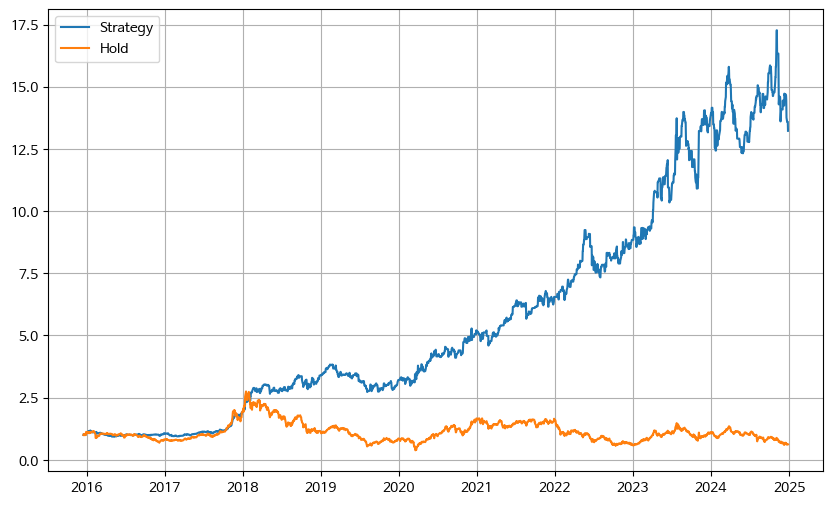

In [120]:
delta_days = kodex150X2.index[-1] - kodex150X2.index[0]
delta_days.days
year = delta_days.days / 365

cagr = (kodex150X2['누적수익률'].iloc[-1] ** (1 / year)) - 1
cagr*100


plt.figure(figsize=(10, 6))

# 변동성 돌파 전략
plt.plot(kodex150X2['누적수익률'], label='Strategy')

# 단순 보유
plt.plot(kodex150X2['종가'] / kodex150X2['종가'].iloc[0], label='Hold')


plt.grid()
plt.legend()
plt.show()

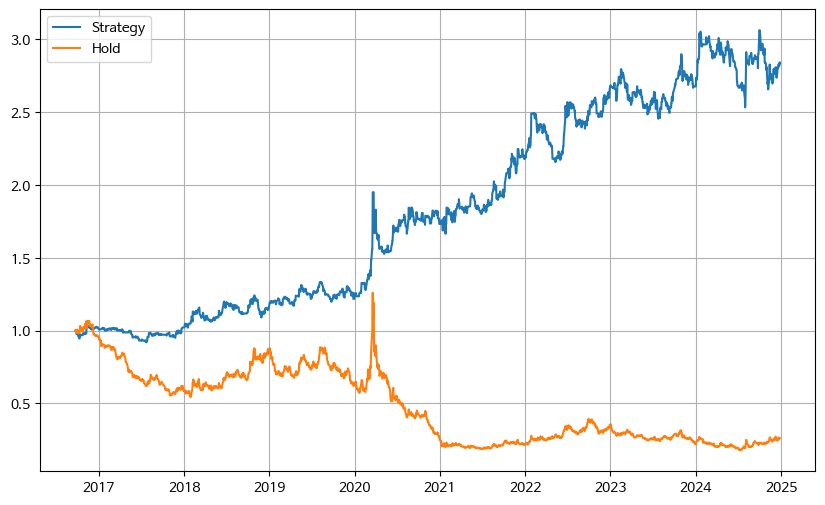

In [121]:
delta_days = kodexInverseX2.index[-1] - kodexInverseX2.index[0]
delta_days.days
year = delta_days.days / 365

cagr = (kodexInverseX2['누적수익률'].iloc[-1] ** (1 / year)) - 1
cagr*100

plt.figure(figsize=(10, 6))

# 변동성 돌파 전략
plt.plot(kodexInverseX2['누적수익률'], label='Strategy')

# 단순 보유
plt.plot(kodexInverseX2['종가'] / kodexInverseX2['종가'].iloc[0], label='Hold')


plt.grid()
plt.legend()
plt.show()

In [122]:
# 0.7 150x2 20
# 0.7 inversex2 6


# 0.5 150x2 28
# 0.5 inversex2 12


# 0.3 150x2 33
# 0.3 inversex2 13

# 결론 0.3 하자~